In [2]:
#Visualise defence results

#Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec
from matplotlib.patches import Patch
import seaborn as sns


In [10]:
#Load data from csv
def load_csv_data(filename="defence_results(2).csv"):
    """
    Load data from a CSV file in the same GitHub folder.
    
    Parameters:
    filename (str): Name of the CSV file to read, defaults to 'defence_results.csv'
    
    Returns:
    pandas.DataFrame: The data from the CSV file
    """
    try:
        # Read the CSV file into a pandas DataFrame
        data = pd.read_csv(filename)
        return data
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found in the current directory.")
        return None
    except Exception as e:
        print(f"Error loading CSV data: {e}")
        return None

In [ ]:
#Load dataset
df = load_csv_data()

#Filter dataframe to only show fgsm results
data_to_remove = ['clean', 'clean_smoothed', 'pgd', 'pgd_smoothed']
df = df[~df['data_type'].isin(data_to_remove)]


In [12]:
print(df)

       model            defence      data_type  accuracy  f1_score
8         rf               none           fgsm     0.213  0.209111
9         rf  feature_smoothing  fgsm_smoothed     0.164  0.149326
10        nn               none           fgsm     0.006  0.009416
11        nn  feature_smoothing  fgsm_smoothed     0.006  0.009416
12    nn_adv               none           fgsm     0.077  0.045175
13    nn_adv  feature_smoothing  fgsm_smoothed     0.077  0.045175
14  ensemble               none           fgsm     0.006  0.009437
15  ensemble  feature_smoothing  fgsm_smoothed     0.006  0.009416


In [20]:
#Version 2
def create_advanced_performance_comparison(csv_file="defence_results(2).csv", output_file="advanced_performance_comparison.png"):
    """
    Create a sophisticated comparison of model performance across metrics
    
    Parameters:
    csv_file (str): Path to the CSV file containing performance data
    output_file (str): Path to save the visualization
    """

    #Load dataset
    df = load_csv_data()

    #Filter dataframe to only show fgsm results
    data_to_remove = ['clean', 'clean_smoothed', 'pgd', 'pgd_smoothed']
    df = df[~df['data_type'].isin(data_to_remove)]
    
    # Create colorblind-friendly palette
    # Using a colorblind-friendly palette from ColorBrewer
    colors = ['#1b9e77', '#d95f02', '#7570b3']
    model_colors = dict(zip(df['model'].unique(), colors))
    
    # Set up figure with GridSpec for complex layout
    fig = plt.figure(figsize=(16, 12))
    gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1.2])
    
    # Plot 1: Bar plot with error bars (top left)
    ax1 = plt.subplot(gs[0, 0])
    
    # Calculate improvement percentages for accuracy
    pivot_acc = df.pivot_table(index='model', columns='defence', values='accuracy')
    pivot_acc['improvement'] = (pivot_acc['feature_smoothing'] - pivot_acc['none']) / pivot_acc['none'] * 100
    
    # Create bar plot for accuracy with improved styling
    ax1 = sns.barplot(
        x='model',
        y='accuracy',
        hue='defence',
        data=df,
        palette=['#2c7fb8', '#7fcdbb'],  # Blue for none, teal for feature_smoothing
        ax=ax1,
        alpha=0.85
    )
    
    # Enhance with actual values
    for i, p in enumerate(ax1.patches):
        height = p.get_height()
        ax1.text(
            p.get_x() + p.get_width()/2.,
            height + 0.01,
            f'{height:.4f}',
            ha="center", 
            fontsize=9,
            color='black',
            fontweight='bold'
        )
    
    # Add improvement percentages for each model
    for i, model in enumerate(pivot_acc.index):
        improvement = pivot_acc.loc[model, 'improvement']
        if abs(improvement) >= 0.1:  # Only show if change is at least 0.1%
            color = 'green' if improvement > 0 else 'red'
            ax1.text(
                i, 
                0.05,
                f"{improvement:+.2f}%",
                ha="center", 
                fontsize=10,
                color=color,
                fontweight='bold'
            )
    
    ax1.set_title('Model Accuracy by Defence Method after FGSM', fontweight='bold')
    ax1.set_xlabel('Model')
    ax1.set_ylabel('Accuracy')
    ax1.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Plot 2: Bar plot for F1 score (top right)
    ax2 = plt.subplot(gs[0, 1])
    
    # Calculate improvement percentages for F1 score
    pivot_f1 = df.pivot_table(index='model', columns='defence', values='f1_score')
    pivot_f1['improvement'] = (pivot_f1['feature_smoothing'] - pivot_f1['none']) / pivot_f1['none'] * 100
    
    # Create bar plot for f1_score with improved styling
    ax2 = sns.barplot(
        x='model',
        y='f1_score',
        hue='defence',
        data=df,
        palette=['#2c7fb8', '#7fcdbb'],  # Blue for none, teal for feature_smoothing
        ax=ax2,
        alpha=0.85
    )
    
    # Enhance with actual values
    for i, p in enumerate(ax2.patches):
        height = p.get_height()
        ax2.text(
            p.get_x() + p.get_width()/2.,
            height + 0.01,
            f'{height:.4f}',
            ha="center", 
            fontsize=9,
            color='black',
            fontweight='bold'
        )
    
    # Add improvement percentages for each model
    for i, model in enumerate(pivot_f1.index):
        improvement = pivot_f1.loc[model, 'improvement']
        if abs(improvement) >= 0.1:  # Only show if change is at least 0.1%
            color = 'green' if improvement > 0 else 'red'
            ax2.text(
                i, 
                0.05,
                f"{improvement:+.2f}%",
                ha="center", 
                fontsize=10,
                color=color,
                fontweight='bold'
            )
    
    ax2.set_title('Model F1 Score by Defence Method after FGSM', fontweight='bold')
    ax2.set_xlabel('Model')
    ax2.set_ylabel('F1 Score')
    ax2.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Plot 3: Performance metrics comparison (bottom left)
    ax3 = plt.subplot(gs[1, 0])
    
    # Create a dot plot instead of radar chart - better for direct comparisons
    # Before using precision and recall, check if they exist in the dataframe
    metrics = ['accuracy', 'f1_score']
    if 'precision' in df.columns:
        metrics.append('precision')
    if 'recall' in df.columns:
        metrics.append('recall')
        
    # Melt the dataframe to get all metrics in a single column
    df_metrics = df.melt(
        id_vars=['model', 'defence'],
        value_vars=metrics,
        var_name='metric', 
        value_name='value'
    )
    
    # Create the dot plot - split by defense method
    # First, plot 'none' defense
    sns.pointplot(
        data=df_metrics[df_metrics['defence'] == 'none'],
        x='metric',
        y='value',
        hue='model',
        palette=colors,
        markers='o',  # Circle marker
        linestyles='-',  # Solid line
        ax=ax3,
        errwidth=2,
        capsize=0.2
    )
    
    # Then plot 'feature_smoothing' defense with different markers and linestyle
    sns.pointplot(
        data=df_metrics[df_metrics['defence'] == 'feature_smoothing'],
        x='metric',
        y='value',
        hue='model',
        palette=colors,
        markers='s',  # Square marker
        linestyles='--',  # Dashed line
        ax=ax3,
        errwidth=2,
        capsize=0.2
    )
    
    # Create a custom legend that includes defense methods
    from matplotlib.lines import Line2D
    handles, labels = ax3.get_legend_handles_labels()
    defense_handles = [
        Line2D([0], [0], marker='o', color='gray', linestyle='-', markersize=8, label='No Defense'),
        Line2D([0], [0], marker='s', color='gray', linestyle='--', markersize=8, label='Feature Smoothing')
    ]
    # Remove the existing legend
    ax3.get_legend().remove()

    # Add a new legend with both model and defense information
    ax3.legend(handles=handles + defense_handles, 
               labels=labels + ['No Defense', 'Feature Smoothing'],
               title='Model & Defense',
               loc='best')
    
    ax3.set_title('Performance Metrics Comparison after FGSM', fontweight='bold')
    ax3.set_xlabel('Metric')
    ax3.set_ylabel('Score')
    ax3.grid(axis='y', linestyle='--', alpha=0.7)
    ax3.set_ylim(0, 1.0)  # Set y-axis from 0 to 1 for better comparison
    
    # Add a table summarizing key findings
    table_data = []
    models = df['model'].unique()
    
    for model in models:
        model_data = df[df['model'] == model]
        
        # Safely get values, handling potential missing data
        try:
            acc_none = model_data[model_data['defence'] == 'none']['accuracy'].values[0]
            acc_fs = model_data[model_data['defence'] == 'feature_smoothing']['accuracy'].values[0]
            f1_none = model_data[model_data['defence'] == 'none']['f1_score'].values[0]
            f1_fs = model_data[model_data['defence'] == 'feature_smoothing']['f1_score'].values[0]
            
            acc_change = ((acc_fs - acc_none) / acc_none) * 100
            f1_change = ((f1_fs - f1_none) / f1_none) * 100
            
            table_data.append([model, f"{acc_change:+.2f}%", f"{f1_change:+.2f}%"])
        except (IndexError, ZeroDivisionError):
            # Handle cases where data might be missing
            table_data.append([model, "N/A", "N/A"])
    
    # Only create table if we have data
    if table_data:
        table = ax3.table(
            cellText=table_data,
            colLabels=['Model', 'Acc. Change', 'F1 Change'],
            loc='bottom',
            cellLoc='center',
            bbox=[0.0, -0.35, 1.0, 0.2]
        )
        table.auto_set_font_size(False)
        table.set_fontsize(9)
        table.scale(1, 1.5)
        
        plt.subplots_adjust(bottom=0.25)
    
    # Plot 4: Heatmap comparison (bottom right)
    ax4 = plt.subplot(gs[1, 1])
    
    # Reshape data for heatmap
    pivot_acc = df.pivot_table(index='model', columns='defence', values='accuracy')
    pivot_f1 = df.pivot_table(index='model', columns='defence', values='f1_score')
    
    # Create labels for annotations
    def create_annotation_text(acc, f1):
        return f'Acc: {acc:.4f}\nF1: {f1:.4f}'
    
    # Create annotation labels
    annotations = np.empty_like(pivot_acc, dtype=object)
    for i in range(pivot_acc.shape[0]):
        for j in range(pivot_acc.shape[1]):
            annotations[i,j] = create_annotation_text(
                pivot_acc.iloc[i,j], 
                pivot_f1.iloc[i,j]
            )
    
    # Create a composite metric for coloring (e.g., average of acc and F1)
    composite_score = (pivot_acc + pivot_f1) / 2
    
    # Create a better colormap for the heatmap (yellow-green-blue)
    cmap = LinearSegmentedColormap.from_list(
        'custom_cmap', 
        ['#4575b4', '#91bfdb', '#e0f3f8', '#ffffbf', '#fee090', '#fc8d59', '#d73027'][::-1]
    )
    
    # Create heatmap with improved styling
    sns.heatmap(
        composite_score, 
        annot=annotations, 
        fmt='', 
        cmap=cmap, 
        linewidths=.5, 
        cbar_kws={'label': 'Avg(Accuracy, F1)'},
        ax=ax4,
        annot_kws={"fontsize": 9, "fontweight": "bold"}
    )
    
    ax4.set_title('Performance Metrics by Model and Defence', fontweight='bold')
    ax4.set_xlabel('Defence Method')
    ax4.set_ylabel('Model')
    
    # Add overall figure title
    plt.suptitle('Advanced Analysis of Model Performance with Defence Methods', 
                 fontsize=20, fontweight='bold', y=0.98)
    
    # Add explanatory text box
    description_text = """
    Feature Smoothing Defence: A technique that reduces adversarial vulnerability by
    smoothing input features, potentially at a small cost to performance on clean data.
    
    Key observations:
    • Random Forest (rf) models significantly outperform other architectures
    • Neural networks show minimal change with feature smoothing
    • Best overall performance: Random Forest with no defence
    """
    
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    fig.text(0.5, 0.02, description_text, ha='left', va='bottom', fontsize=11, 
             bbox=props, transform=fig.transFigure)
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0.07, 1, 0.96])
    
    # Save figure
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"Advanced performance comparison saved to {output_file}")
    return fig

In [18]:
def create_model_comparison_report(csv_file="defence_results(2).csv", output_file="model_comparison_report.png"):
    """
    Create a comprehensive visual report comparing models
    
    Parameters:
    df (pandas.DataFrame): Input data
    output_file (str): Path to save the visualization
    """

    # Read the CSV file
    df = pd.read_csv(csv_file)

    # Aggregate metrics by model
    model_metrics = df.groupby('model').agg({
        'accuracy': ['mean', 'std'],
        'f1_score': ['mean', 'std']
    }).reset_index()
    
    # Flatten multi-index columns
    model_metrics.columns = ['model', 'accuracy_mean', 'accuracy_std', 'f1_mean', 'f1_std']
    
    # Calculate combined performance score
    model_metrics['performance_score'] = (model_metrics['accuracy_mean'] + model_metrics['f1_mean']) / 2
    
    # Set up the figure
    fig = plt.figure(figsize=(15, 10))
    gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])
    
    # Plot 1: Bar chart with error bars for accuracy
    ax1 = plt.subplot(gs[0, 0])
    
    # Plot accuracy with error bars
    ax1.bar(
        model_metrics['model'],
        model_metrics['accuracy_mean'],
        yerr=model_metrics['accuracy_std'],
        capsize=10,
        color=sns.color_palette("viridis", len(model_metrics)),
        alpha=0.7
    )
    
    # Add actual values on top of bars
    for i, (_, row) in enumerate(model_metrics.iterrows()):
        ax1.text(
            i,
            row['accuracy_mean'] + row['accuracy_std'] + 0.01,
            f"{row['accuracy_mean']:.4f} ± {row['accuracy_std']:.4f}",
            ha='center',
            fontsize=9,
            rotation=0
        )
    
    ax1.set_title('Average Accuracy by Model', fontweight='bold')
    ax1.set_xlabel('Model')
    ax1.set_ylabel('Accuracy')
    ax1.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Plot 2: Bar chart with error bars for F1 score
    ax2 = plt.subplot(gs[0, 1])
    
    # Plot F1 score with error bars
    ax2.bar(
        model_metrics['model'],
        model_metrics['f1_mean'],
        yerr=model_metrics['f1_std'],
        capsize=10,
        color=sns.color_palette("viridis", len(model_metrics)),
        alpha=0.7
    )
    
    # Add actual values on top of bars
    for i, (_, row) in enumerate(model_metrics.iterrows()):
        ax2.text(
            i,
            row['f1_mean'] + row['f1_std'] + 0.01,
            f"{row['f1_mean']:.4f} ± {row['f1_std']:.4f}",
            ha='center',
            fontsize=9,
            rotation=0
        )
    
    ax2.set_title('Average F1 Score by Model', fontweight='bold')
    ax2.set_xlabel('Model')
    ax2.set_ylabel('F1 Score')
    ax2.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Plot 3: Overall performance score
    ax3 = plt.subplot(gs[1, 0])
    
    # Create horizontal sorted bar chart
    sorted_metrics = model_metrics.sort_values('performance_score', ascending=True)
    bars = ax3.barh(
        sorted_metrics['model'],
        sorted_metrics['performance_score'],
        color=sns.color_palette("viridis", len(model_metrics)),
        alpha=0.8
    )
    
    # Add value labels
    for bar in bars:
        width = bar.get_width()
        ax3.text(
            width + 0.01,
            bar.get_y() + bar.get_height()/2,
            f"{width:.4f}",
            ha='left',
            va='center',
            fontsize=10
        )
    
    ax3.set_title('Combined Performance Score by Model', fontweight='bold')
    ax3.set_xlabel('Performance Score (Higher is Better)')
    ax3.set_ylabel('Model')
    ax3.grid(axis='x', linestyle='--', alpha=0.7)
    
    # Plot 4: Defense effectiveness across models
    ax4 = plt.subplot(gs[1, 1])
    
    # Calculate defense effectiveness
    defense_comparison = []
    for model in df['model'].unique():
        model_data = df[df['model'] == model]
        
        # Get data for each defense type
        no_defense = model_data[model_data['defence'] == 'none']
        with_defense = model_data[model_data['defence'] != 'none']
        
        if not no_defense.empty and not with_defense.empty:
            no_def_acc = no_defense['accuracy'].values[0]
            no_def_f1 = no_defense['f1_score'].values[0]
            
            # Get mean metrics with defense
            def_acc = with_defense['accuracy'].mean()
            def_f1 = with_defense['f1_score'].mean()
            
            # Calculate percentage impact
            acc_impact = ((def_acc - no_def_acc) / no_def_acc) * 100
            f1_impact = ((def_f1 - no_def_f1) / no_def_f1) * 100
            
            defense_comparison.append({
                'model': model,
                'acc_impact': acc_impact,
                'f1_impact': f1_impact
            })
    
    # Convert to DataFrame
    defense_df = pd.DataFrame(defense_comparison)
    
    # Melt for seaborn
    defense_melt = pd.melt(
        defense_df,
        id_vars=['model'],
        value_vars=['acc_impact', 'f1_impact'],
        var_name='metric',
        value_name='impact'
    )
    
    # Replace column names for better labels
    defense_melt['metric'] = defense_melt['metric'].replace({
        'acc_impact': 'Accuracy Impact',
        'f1_impact': 'F1 Score Impact'
    })
    
    # Create grouped bar chart for defense impact
    sns.barplot(
        data=defense_melt,
        x='model',
        y='impact',
        hue='metric',
        palette=['#3498db', '#e74c3c'],
        ax=ax4
    )
    
    # Add reference line at 0
    ax4.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    # Add value labels
    for p in ax4.patches:
        height = p.get_height()
        if not np.isnan(height):
            sign = "+" if height > 0 else ""
            ax4.text(
                p.get_x() + p.get_width()/2.,
                height + (0.5 if height >= 0 else -2),
                f"{sign}{height:.2f}%",
                ha="center", 
                fontsize=9
            )
    
    ax4.set_title('Defense Impact on Model Performance', fontweight='bold')
    ax4.set_xlabel('Model')
    ax4.set_ylabel('Percentage Impact (%)')
    ax4.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add overall figure title
    plt.suptitle('Comprehensive Model Performance Analysis', 
                fontsize=20, fontweight='bold', y=0.98)
    
    # Add methodology note
    fig.text(0.5, 0.02, 
            "Performance Score = Average of Accuracy and F1 Score metrics\n"
            "Defense Impact = % change in performance with defense vs. without defense", 
            ha='center', fontsize=11, style='italic')
    
    # Adjust layout and save
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"Model comparison report saved to {output_file}")
    return fig

Model comparison report saved to model_comparison_report.png


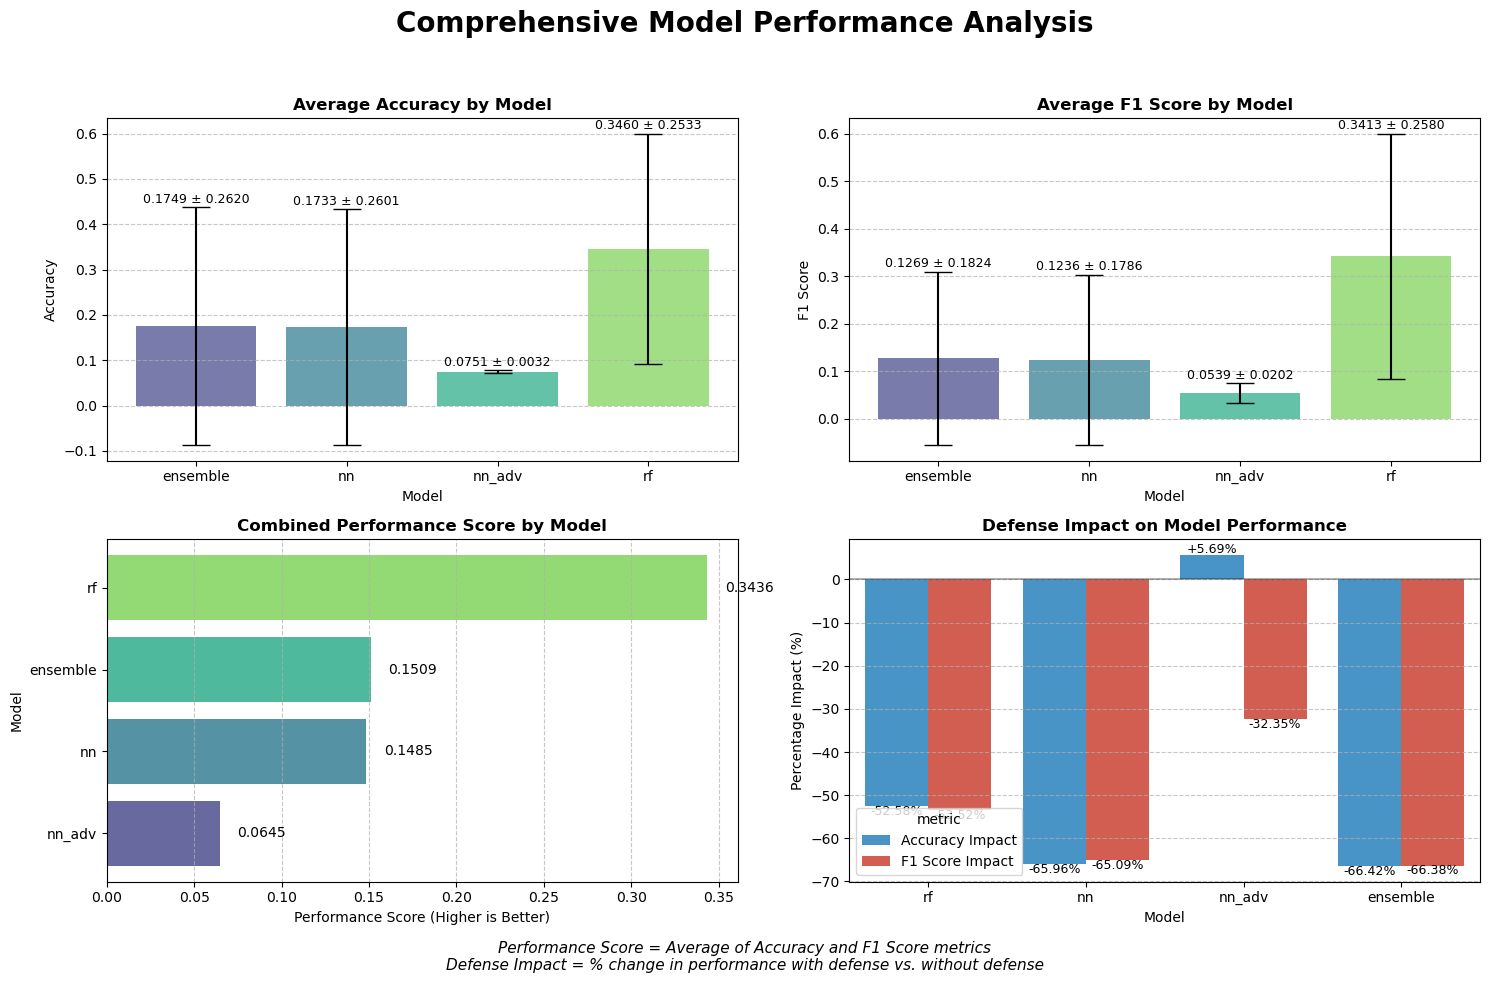

In [19]:
create_model_comparison_report()

Advanced performance comparison saved to advanced_performance_comparison.png


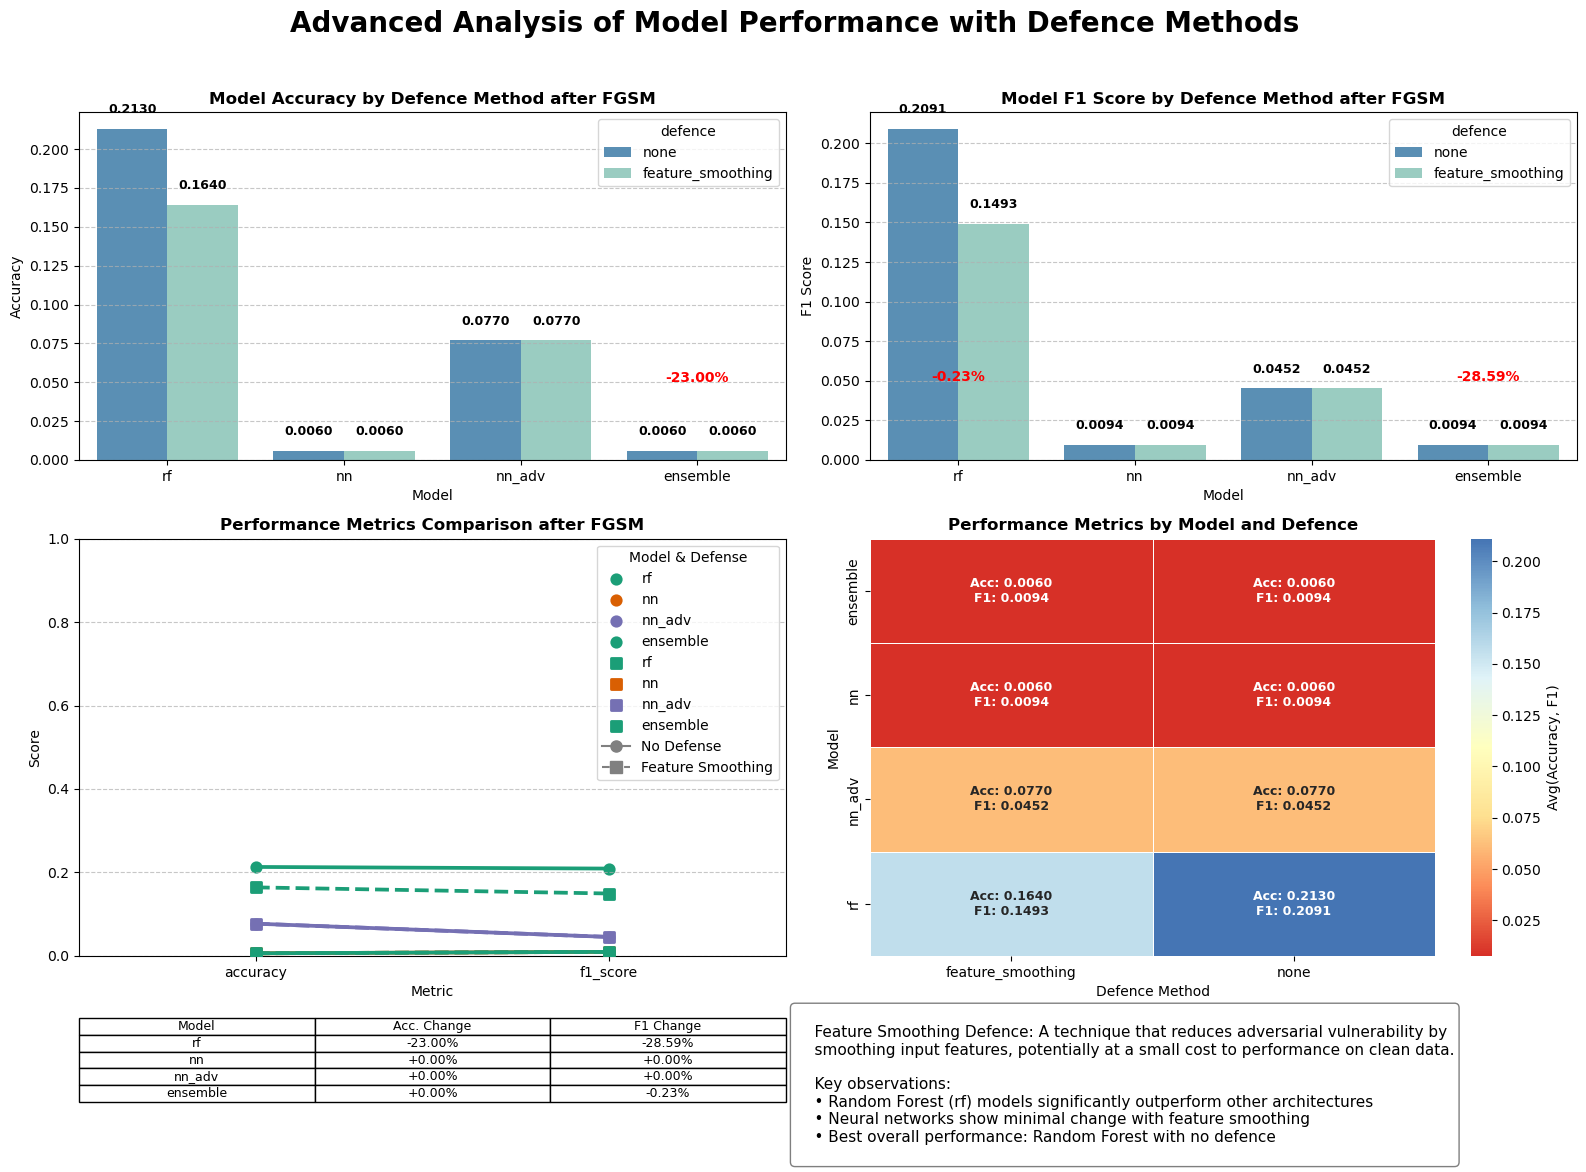

In [21]:
create_advanced_performance_comparison(df)

In [37]:
table_result = visualise_defence_results(output_file="defence_results_table.png")
    
# Create and save graphs
fig = visualise_results_graph_simple()
plt.savefig("defence_results_visualisation_col.png", dpi=300, bbox_inches="tight")
plt.close(fig)
    
# Create separate graphs for each metric
fig_acc = visualise_results_graph_simple(metric="accuracy")
plt.savefig("accuracy_comparison_col.png", dpi=300, bbox_inches="tight")
plt.close(fig_acc)
    
fig_f1 = visualise_results_graph_simple(metric="f1_score")
plt.savefig("f1_score_comparison_col.png", dpi=300, bbox_inches="tight")
plt.close(fig_f1)

#Create complex visualisations
create_advanced_performance_comparison()
create_defence_impact_analysis()
create_model_comparison_report()
    
print("Files saved:") 
print("- defence_results_table.png (table visualisation)")
print("- defence_results_visualisation_col.png (both metrics)")
print("- accuracy_comparison_col.png")
print("- f1_score_comparison_col.png")
print("1. advanced_performance_comparison.png - Detailed performance metrics")
print("2. defence_impact_analysis.png - Impact of defence on model performance")
print("3. model_comparison_report.png - Comprehensive model comparison")





Table successfully exported to defence_results_table.png
Advanced performance comparison saved to advanced_performance_comparison.png
Defence impact analysis saved to defence_impact_analysis.png
Model comparison report saved to model_comparison_report.png
Files saved:
- defence_results_table.png (table visualisation)
- defence_results_visualisation_col.png (both metrics)
- accuracy_comparison_col.png
- f1_score_comparison_col.png
1. advanced_performance_comparison.png - Detailed performance metrics
2. defence_impact_analysis.png - Impact of defence on model performance
3. model_comparison_report.png - Comprehensive model comparison
